In [27]:
import numpy as np
docs=['go india',
      'india india',
      'hip hip hurray',
		  'jeetega bhai jeetega india jeetega',
		  'bharat mata ki jai',
		  'kohli kohli',
		  'sachin sachin',
		  'dhoni dhoni',
		  'Radhavallabh shriharivansh',
		  'inquilab zindabad',
			'Radhe Radhe'
]

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(oov_token='<nothing>')


In [29]:
tokenizer.fit_on_texts(docs)

In [30]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 1),
             ('jai', 1),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('radhavallabh', 1),
             ('shriharivansh', 1),
             ('inquilab', 1),
             ('zindabad', 1),
             ('radhe', 2)])

In [31]:
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'kohli': 5,
 'sachin': 6,
 'dhoni': 7,
 'radhe': 8,
 'go': 9,
 'hurray': 10,
 'bhai': 11,
 'bharat': 12,
 'mata': 13,
 'ki': 14,
 'jai': 15,
 'radhavallabh': 16,
 'shriharivansh': 17,
 'inquilab': 18,
 'zindabad': 19}

In [32]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 1),
             ('jai', 1),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('radhavallabh', 1),
             ('shriharivansh', 1),
             ('inquilab', 1),
             ('zindabad', 1),
             ('radhe', 2)])

In [33]:
tokenizer.document_count

11

In [34]:
sequences=tokenizer.texts_to_sequences(docs)
sequences

[[9, 2],
 [2, 2],
 [4, 4, 10],
 [3, 11, 3, 2, 3],
 [12, 13, 14, 15],
 [5, 5],
 [6, 6],
 [7, 7],
 [16, 17],
 [18, 19],
 [8, 8]]

In [35]:
from keras.utils import pad_sequences
sequence=pad_sequences(sequences,padding='post')


In [36]:
sequence

array([[ 9,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 10,  0,  0],
       [ 3, 11,  3,  2,  3],
       [12, 13, 14, 15,  0],
       [ 5,  5,  0,  0,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [16, 17,  0,  0,  0],
       [18, 19,  0,  0,  0],
       [ 8,  8,  0,  0,  0]], dtype=int32)

In [37]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [38]:
(X_train,y_train),(X_test,y_test)=imdb.load_data()

In [39]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [40]:
len(X_train[1])

189

In [41]:
from keras.utils import pad_sequences
X_train=pad_sequences(X_train,padding='post',maxlen=50)
X_test=pad_sequences(X_test,padding='post',maxlen=50)

In [42]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

In [43]:
model=Sequential()
model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
# @title
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4993 - loss: 0.6948 - val_accuracy: 0.5019 - val_loss: 0.6944
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5099 - loss: 0.6934 - val_accuracy: 0.5069 - val_loss: 0.6945
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5049 - loss: 0.6932 - val_accuracy: 0.5046 - val_loss: 0.6937
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5017 - loss: 0.6936 - val_accuracy: 0.5023 - val_loss: 0.6944
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5140 - loss: 0.6924 - val_accuracy: 0.5060 - val_loss: 0.6938


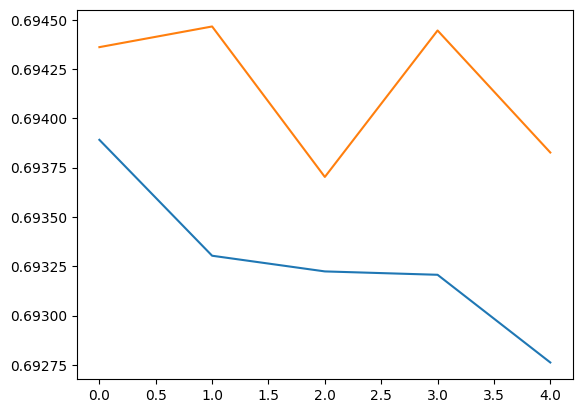

In [46]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

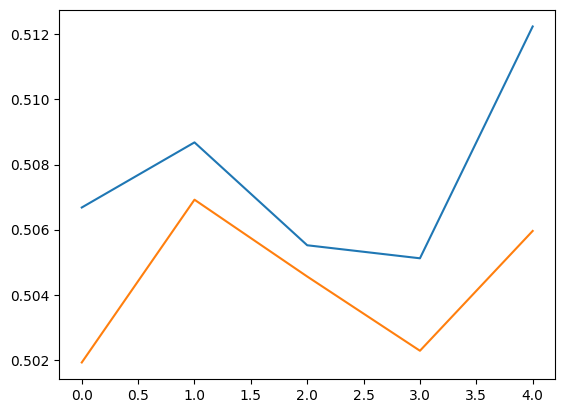

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])